### SUPPLEMENTARY MATERIAL - FIGURE xx
#### Statistical analysis of Air-sea flux for 5 years of the contemporary run

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
from __future__ import print_function

import matplotlib.pyplot as plt
import pickle
import netCDF4 as nc
import numpy as np
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')
import cmocean as cm
import glob

%matplotlib inline


##### RETRIEVE AND PICKLE OUTPUT OF CONTEMPORARY HINDCAST

In [5]:
# days = ['01','06','11','16','21','26']
# mons = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# tyr = '17'
# tdir = '/data/sallen/results/MEOPAR/fluxes/'
# dir2 = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# tnam = dir2 + 'hind_insitu_2017.pkl'

# flux_13 = np.zeros([365,898,398])

# tind = 0
# for m in mons:
#     for d in days:
#         if tind%20 == 0:
#             print(tind)
#         tstr = tdir+d+m+tyr+'/'
#         tnc = glob.glob(tstr+'*carp*.nc')
#         w = nc.Dataset(tnc[0])
#         cof = w['co2_flux_mmol_m2_s'][:]
#         scof = (np.shape(cof))[0]
#         flux_13[tind:tind+scof,:,:] = cof
#         tind = tind + scof
        
# #PICKLE code:
# pickle.dump(flux_13, open(tnam, 'wb'))


##### OPEN YEARLY AIR-SEA FLUX FILES (SIZE 365*898*398, YEARS 2013-2017), CONVERT UNITS FROM MMOL/M2/S TO MMOL/M2/DAY
##### CALCULATE AND VISULIZE TIMESERIES OF MEAN DOMAIN-WIDE DAILY FLUX FOR THE 5 YEARS

In [6]:
sec_day = 60*60*24 #CONVERT FROM MMOL/M2/SEC TO MMOL/M2/DAY

hindcast2013_co2_flx = pickle.load(open('../pkls/hind_insitu_2013.pkl', 'rb'))  * sec_day
hindcast2014_co2_flx = pickle.load(open('../pkls/hind_insitu_2014.pkl', 'rb'))  * sec_day
hindcast2015_co2_flx = pickle.load(open('../pkls/hind_insitu_2015.pkl', 'rb'))  * sec_day
hindcast2016_co2_flx = pickle.load(open('../pkls/hind_insitu_2016.pkl', 'rb'))  * sec_day
hindcast2017_co2_flx = pickle.load(open('../pkls/hind_insitu_2017.pkl', 'rb'))  * sec_day

In [7]:
hindcast2013_co2_flx_1d = np.zeros(365)
hindcast2013_co2_flx[hindcast2013_co2_flx>1e10] = 0
hindcast2013_co2_flx[hindcast2013_co2_flx == 0] = np.nan
for i in range(0,365):
    hindcast2013_co2_flx_1d[i] = np.nanmean(hindcast2013_co2_flx[i,:,:])

hindcast2014_co2_flx_1d = np.zeros(365)
hindcast2014_co2_flx[hindcast2014_co2_flx>1e10] = 0
hindcast2014_co2_flx[hindcast2014_co2_flx == 0] = np.nan
for i in range(0,365):
    hindcast2014_co2_flx_1d[i] = np.nanmean(hindcast2014_co2_flx[i,:,:])

hindcast2015_co2_flx_1d = np.zeros(365)
hindcast2015_co2_flx[hindcast2015_co2_flx>1e10] = 0
hindcast2015_co2_flx[hindcast2015_co2_flx == 0] = np.nan
for i in range(0,365):
    hindcast2015_co2_flx_1d[i] = np.nanmean(hindcast2015_co2_flx[i,:,:])

hindcast2016_co2_flx_1d = np.zeros(365)
hindcast2016_co2_flx[hindcast2016_co2_flx>1e10] = 0
hindcast2016_co2_flx[hindcast2016_co2_flx == 0] = np.nan
for i in range(0,365):
    hindcast2016_co2_flx_1d[i] = np.nanmean(hindcast2016_co2_flx[i,:,:])

hindcast2017_co2_flx_1d = np.zeros(365)
hindcast2017_co2_flx[hindcast2017_co2_flx>1e10] = 0
hindcast2017_co2_flx[hindcast2017_co2_flx == 0] = np.nan
for i in range(0,365):
    hindcast2017_co2_flx_1d[i] = np.nanmean(hindcast2017_co2_flx[i,:,:])


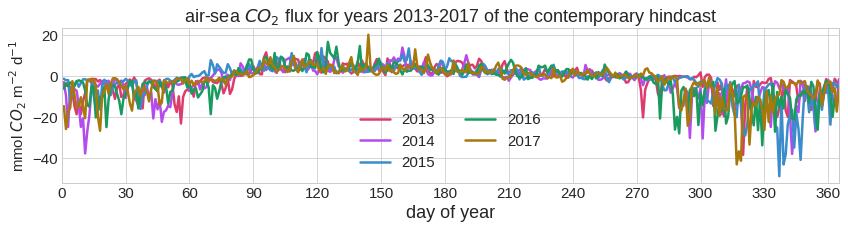

In [8]:

days = np.arange(1,366,1)
tcm = cm.cm.phase

fs = 18
fact = 0.7
fig = plt.figure(figsize=(17*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(2,1,1)

ax1.plot(days,hindcast2013_co2_flx_1d, \
         color = tcm(1.*1/5),linewidth = lw, linestyle = '-', label = '2013')
ax1.plot(days,hindcast2014_co2_flx_1d, \
         color = tcm(1.*2/5),linewidth = lw, linestyle = '-', label = '2014')
ax1.plot(days,hindcast2015_co2_flx_1d, \
         color = tcm(1.*3/5),linewidth = lw, linestyle = '-', label = '2015')
ax1.plot(days,hindcast2016_co2_flx_1d, \
         color = tcm(1.*4/5),linewidth = lw, linestyle = '-', label = '2016')
ax1.plot(days,hindcast2017_co2_flx_1d, \
         color = tcm(1.*5/5),linewidth = lw, linestyle = '-', label = '2017')

ax1.set_ylabel('mmol $CO_2$ m$^{-2}$ d$^{-1}$', fontsize = 15)
ax1.set_title('air-sea $CO_2$ flux for years 2013-2017 of the contemporary hindcast', fontsize = 18)
ax1.set_xlim(0,365)
w = ax1.set_xticks(np.arange(0, 365, step=30))

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(loc="best",ncol=2, fontsize = 15)
w = ax1.set_xticks(np.arange(0, 365, step=30))
ax1.set_xlim(0,365)
ax1.set_xlabel('day of year', fontsize = 18)
plt.tight_layout()

##### DETERMINING EPISODICITY OF INGASSING AND OUTGASSING

In [9]:
pos2013 = np.sort(hindcast2013_co2_flx_1d[hindcast2013_co2_flx_1d>0])[::-1]
neg2013 = np.sort(-1*hindcast2013_co2_flx_1d[hindcast2013_co2_flx_1d<0])[::-1]
pos2014 = np.sort(hindcast2014_co2_flx_1d[hindcast2014_co2_flx_1d>0])[::-1]
neg2014 = np.sort(-1*hindcast2014_co2_flx_1d[hindcast2014_co2_flx_1d<0])[::-1]
pos2015 = np.sort(hindcast2015_co2_flx_1d[hindcast2015_co2_flx_1d>0])[::-1]
neg2015 = np.sort(-1*hindcast2015_co2_flx_1d[hindcast2015_co2_flx_1d<0])[::-1]
pos2016 = np.sort(hindcast2016_co2_flx_1d[hindcast2016_co2_flx_1d>0])[::-1]
neg2016 = np.sort(-1*hindcast2016_co2_flx_1d[hindcast2016_co2_flx_1d<0])[::-1]
pos2017 = np.sort(hindcast2017_co2_flx_1d[hindcast2017_co2_flx_1d>0])[::-1]
neg2017 = np.sort(-1*hindcast2017_co2_flx_1d[hindcast2017_co2_flx_1d<0])[::-1]


pos_prop_2013 = np.zeros(365); neg_prop_2013 = np.zeros(365)
pos_prop_2014 = np.zeros(365); neg_prop_2014 = np.zeros(365)
pos_prop_2015 = np.zeros(365); neg_prop_2015 = np.zeros(365)
pos_prop_2016 = np.zeros(365); neg_prop_2016 = np.zeros(365)
pos_prop_2017 = np.zeros(365); neg_prop_2017 = np.zeros(365)

for i in range(0,365):

    pos_prop_2013[i] = np.sum(pos2013[0:i+1])/np.sum(pos2013)
    neg_prop_2013[i] = np.sum(neg2013[0:i+1])/np.sum(neg2013)
    pos_prop_2014[i] = np.sum(pos2014[0:i+1])/np.sum(pos2014)
    neg_prop_2014[i] = np.sum(neg2014[0:i+1])/np.sum(neg2014)
    pos_prop_2015[i] = np.sum(pos2015[0:i+1])/np.sum(pos2015)
    neg_prop_2015[i] = np.sum(neg2015[0:i+1])/np.sum(neg2015)
    pos_prop_2016[i] = np.sum(pos2016[0:i+1])/np.sum(pos2016)
    neg_prop_2016[i] = np.sum(neg2016[0:i+1])/np.sum(neg2016)
    pos_prop_2017[i] = np.sum(pos2017[0:i+1])/np.sum(pos2017)
    neg_prop_2017[i] = np.sum(neg2017[0:i+1])/np.sum(neg2017)
    
print('prop of ingassing days resp for >50%ingassing')

w = np.where(pos_prop_2013>.5)
days_pos = np.size(pos2013)
first_day = w[0][0]
print(first_day/days_pos)

w = np.where(pos_prop_2014>.5)
days_pos = np.size(pos2014)
first_day = w[0][0]
print(first_day/days_pos)

w = np.where(pos_prop_2015>.5)
days_pos = np.size(pos2015)
first_day = w[0][0]
print(first_day/days_pos)

w = np.where(pos_prop_2016>.5)
days_pos = np.size(pos2016)
first_day = w[0][0]
print(first_day/days_pos)

w = np.where(pos_prop_2017>.5)
days_pos = np.size(pos2017)
first_day = w[0][0]
print(first_day/days_pos)

print('prop days resp for >50% outgassing')

w = np.where(neg_prop_2013>.5)
days_neg = np.size(neg2013)
first_day = w[0][0]
print(first_day/days_neg)

w = np.where(neg_prop_2014>.5)
days_neg = np.size(neg2014)
first_day = w[0][0]
print(first_day/days_neg)

w = np.where(neg_prop_2015>.5)
days_neg = np.size(neg2015)
first_day = w[0][0]
print(first_day/days_neg)

w = np.where(neg_prop_2016>.5)
days_neg = np.size(neg2016)
first_day = w[0][0]
print(first_day/days_neg)

w = np.where(neg_prop_2017>.5)
days_neg = np.size(neg2017)
first_day = w[0][0]
print(first_day/days_neg)

prop of ingassing days resp for >50%ingassing
0.2388888888888889
0.23204419889502761
0.24083769633507854
0.24157303370786518
0.23728813559322035
prop days resp for >50% outgassing
0.1783783783783784
0.1956521739130435
0.13218390804597702
0.20320855614973263
0.16489361702127658


Text(0.5, 1.0, 'Episodicity of ingassing in 5 years of the contemporary hindcast')

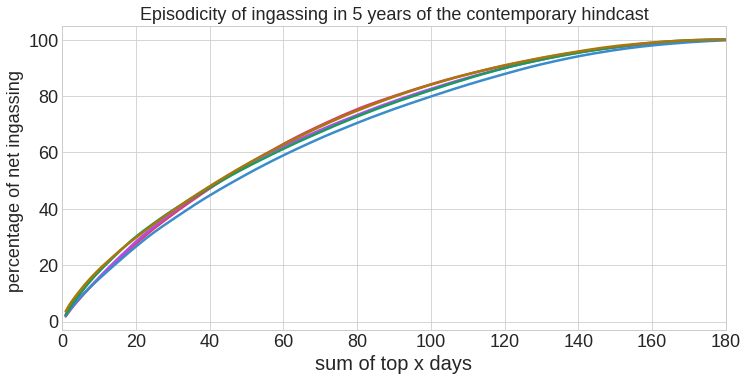

In [10]:
fs = 18
fact = 0.7
fig = plt.figure(figsize=(17*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)

#months
ax1.plot(days,pos_prop_2013*100, color = tcm(1.*1/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2013, days ingassing = '+ str(np.size(pos2013)))
ax1.plot(days,pos_prop_2014*100, color = tcm(1.*2/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2014, days ingassing = '+ str(np.size(pos2014)))
ax1.plot(days,pos_prop_2015*100, color = tcm(1.*3/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2015, days ingassing = '+ str(np.size(pos2015)))
ax1.plot(days,pos_prop_2016*100, color = tcm(1.*4/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2016, days ingassing = '+ str(np.size(pos2016)))
ax1.plot(days,pos_prop_2017*100,  color = tcm(1.*5/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2017, days ingassing = '+ str(np.size(pos2017)))


#ax1.legend(loc = 'best', fontsize = 20)
#ax1.set_xlim(0,100)
ax1.set_yticks(np.arange(0,120,20))
ax1.set_yticklabels(np.arange(0,120,20),fontsize = fs)
ax1.set_xticks(np.arange(0,200,20))
ax1.set_xticklabels(np.arange(0,200,20),fontsize = fs)
ax1.set_xlim([0,180])
ax1.set_xlabel('sum of top x days', fontsize = 20)
ax1.set_ylabel('percentage of net ingassing ', fontsize = fs)
ax1.set_title('Episodicity of ingassing in 5 years of the contemporary hindcast', fontsize = fs)

Text(0.5, 1.0, 'Episodicity of outgassing in 5 years of the contemporary hindcast')

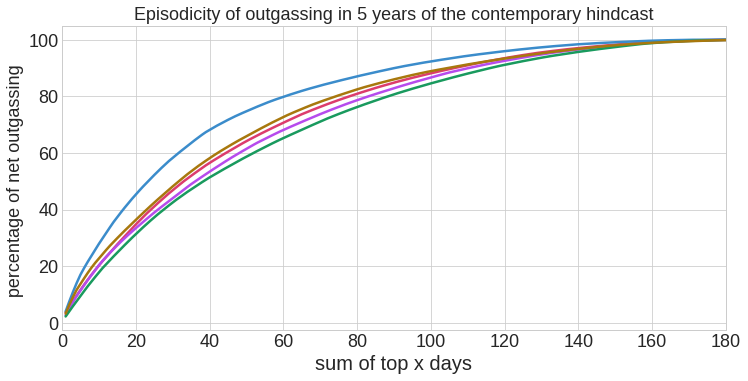

In [11]:
fs = 18
fact = 0.7
fig = plt.figure(figsize=(17*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)

#months
ax1.plot(days,neg_prop_2013*100, color = tcm(1.*1/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2013, days outgassing = '+ str(np.size(neg2013)))
ax1.plot(days,neg_prop_2014*100, color = tcm(1.*2/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2014, days outgassing = '+ str(np.size(neg2014)))
ax1.plot(days,neg_prop_2015*100, color = tcm(1.*3/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2015, days outgassing = '+ str(np.size(neg2015)))
ax1.plot(days,neg_prop_2016*100, color = tcm(1.*4/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2016, days outgassing = '+ str(np.size(neg2016)))
ax1.plot(days,neg_prop_2017*100,  color = tcm(1.*5/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2017, days outgassing = '+ str(np.size(neg2017)))


#ax1.legend(loc = 'best', fontsize = 20)
#ax1.set_xlim(0,100)
ax1.set_yticks(np.arange(0,120,20))
ax1.set_yticklabels(np.arange(0,120,20),fontsize = fs)
ax1.set_xticks(np.arange(0,200,20))
ax1.set_xticklabels(np.arange(0,200,20),fontsize = fs)
ax1.set_xlim([0,180])
ax1.set_xlabel('sum of top x days', fontsize = 20)
ax1.set_ylabel('percentage of net outgassing ', fontsize = fs)
ax1.set_title('Episodicity of outgassing in 5 years of the contemporary hindcast', fontsize = fs)

##### CALCULATING NET AIR-SEA FLUX IN G C / M2/ YR - OUTPUT SIZE 898x398

In [12]:
year_2013 = np.nansum(hindcast2013_co2_flx, axis = 0) * 12.011/1000 # convert mmol/m2/yr to g/m2/yr
year_2013[year_2013 == 0] = np.nan
year_2014 = np.nansum(hindcast2014_co2_flx, axis = 0) * 12.011/1000 # convert mmol/m2/yr to g/m2/yr
year_2014[year_2014 == 0] = np.nan
year_2015 = np.nansum(hindcast2015_co2_flx, axis = 0) * 12.011/1000 # convert mmol/m2/yr to g/m2/yr
year_2015[year_2015 == 0] = np.nan
year_2016 = np.nansum(hindcast2016_co2_flx, axis = 0) * 12.011/1000 # convert mmol/m2/yr to g/m2/yr
year_2016[year_2016 == 0] = np.nan
year_2017 = np.nansum(hindcast2017_co2_flx, axis = 0) * 12.011/1000 # convert mmol/m2/yr to g/m2/yr
year_2017[year_2017 == 0] = np.nan

##### LOADING BR AND PI RUN FLUXES FOR COMPARISON, CALCULATING FLUX IN GC/M2/YR

In [13]:
BR_flx = pickle.load(open('../pkls/flux/BR3_flx.pkl', 'rb'))
BR_flx[BR_flx>1e5]=np.nan

#mmol/m2/s > mmol/m2/day
BR_flx_mmol_m2_day = BR_flx * 86400
BR_daily_mean_mmol_m2_day = np.zeros(365)
for i in range(0,365):
    BR_daily_mean_mmol_m2_day[i] = np.nanmean(BR_flx_mmol_m2_day[i,:,:])

BR_flx_mmol_m2_yr = np.sum(BR_flx_mmol_m2_day, axis = 0)
#mmol/yr to g/yr 12.0107 g/mol /1000 for mmol
BR_flx_gC_m2_yr = BR_flx_mmol_m2_yr*12.0107*1e-3
BR_flx_gC_m2_yr[BR_flx_gC_m2_yr>1e6]=np.nan
BR_flx_gC_m2_yr[BR_flx_gC_m2_yr==0]=np.nan
# print('mean BR flux g/m2/yr')
BR_mean = (np.nanmean(BR_flx_gC_m2_yr))
BR_std = (np.nanstd(BR_flx_gC_m2_yr))

PI_flx = pickle.load(open('../pkls/flux/PI5_flx.pkl', 'rb'))
PI_flx[PI_flx>1e5]=np.nan
print(np.nanmax(PI_flx))
print(np.nanmax(BR_flx))
#mmol/m2/s > mmol/m2/day
PI_flx_mmol_m2_day = PI_flx * 86400
PI_daily_mean_mmol_m2_day = np.zeros(365)
for i in range(0,365):
    PI_daily_mean_mmol_m2_day[i] = np.nanmean(PI_flx_mmol_m2_day[i,:,:])

PI_flx_mmol_m2_yr = np.sum(PI_flx_mmol_m2_day, axis = 0)
#mmol/yr to g/yr 12.0107 g/mol /1000 for mmol
PI_flx_gC_m2_yr = PI_flx_mmol_m2_yr*12.0107*1e-3

PI_flx_gC_m2_yr[PI_flx_gC_m2_yr<-1e6]=np.nan
PI_flx_gC_m2_yr[PI_flx_gC_m2_yr==0]=np.nan
# # print('mean PI flux g/m2/yr')
PI_mean = (np.nanmean(PI_flx_gC_m2_yr))
PI_std = (np.nanstd(PI_flx_gC_m2_yr))



0.0004965048283338547
0.0007545470725744963


##### CALCULATING MEAN AND STD DEV OF HINDCAST YEARS

In [14]:
yrs_2d = [year_2013, year_2014, year_2015, year_2016, year_2017]

yrs_means = np.zeros(5)
yrs_stds = np.zeros(5)
i = 0
for y in yrs_2d:
    yrs_means[i] = (np.nanmean(y))
    yrs_stds[i] = (np.nanstd(y))
    i = i+1

##### SUBPLOT E) - HISTOGRAMS

Text(0.5, 1.0, 'mean air-sea flux (pos # flux in), gold = BR3')

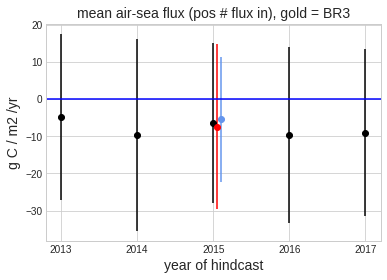

In [15]:
fs = 14
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)

xs = [2013, 2014, 2015, 2016, 2017]
for i in range(0,len(xs)):
    er1 = ax.errorbar(xs[i], yrs_means[i], yerr=[yrs_stds[i]], marker="o", linestyle="none", color = 'black')

ax.errorbar(2015.05, BR_mean, yerr=[BR_std], marker="o", linestyle="none", color = 'red')
ax.errorbar(2015.10, PI_mean, yerr=[PI_std], marker="o", linestyle="none", color = 'cornflowerblue')
ax.axhline(y = 0, color = 'blue')

ax.set_xticks(np.arange(2013,2018,1))
ax.set_ylabel('g C / m2 /yr', fontsize = fs)
ax.set_xlabel('year of hindcast', fontsize = fs)
ax.set_title('mean air-sea flux (pos # flux in), gold = BR3', fontsize = fs)

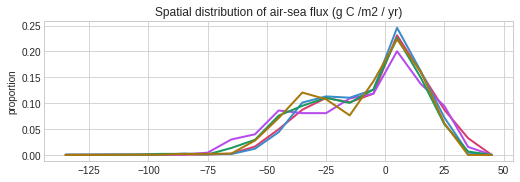

In [16]:
fact = 0.7
fig = plt.figure(figsize=(12*fact, 12.5*fact))

##############################
ax6 = plt.subplot(3,1,2)
ax6.set_title('Spatial distribution of air-sea flux (g C /m2 / yr)')
ax6.set_ylabel('proportion')

nbins = 19

hist_2013, bins = np.histogram(year_2013[~np.isnan(year_2013)], bins=19, range = [-140, 50])
bin_cent = bins + (bins[1]-bins[0])/2
ax6.plot(bin_cent[0:nbins],hist_2013/np.sum(hist_2013), lw = 2, color = tcm(1.*1/5))

hist_2014, bins = np.histogram(year_2014[~np.isnan(year_2014)], bins=19, range = [-140, 50])
bin_cent = bins + (bins[1]-bins[0])/2
ax6.plot(bin_cent[0:nbins],hist_2014/np.sum(hist_2014), lw = 2, color = tcm(2.*1/5))

hist_2015, bins = np.histogram(year_2015[~np.isnan(year_2015)], bins=19, range = [-140, 50])
bin_cent = bins + (bins[1]-bins[0])/2
ax6.plot(bin_cent[0:nbins],hist_2015/np.sum(hist_2015), lw = 2, color = tcm(3.*1/5))

hist_2016, bins = np.histogram(year_2016[~np.isnan(year_2016)], bins=19, range = [-140, 50])
bin_cent = bins + (bins[1]-bins[0])/2
ax6.plot(bin_cent[0:nbins],hist_2016/np.sum(hist_2016), lw = 2, color = tcm(4.*1/5))

hist_2017, bins = np.histogram(year_2017[~np.isnan(year_2017)], bins=19, range = [-140, 50])
bin_cent = bins + (bins[1]-bins[0])/2
ax6.plot(bin_cent[0:nbins],hist_2017/np.sum(hist_2017), lw = 2, color = tcm(5.*1/5))

#ax6.legend(bbox_to_anchor=[1.5, 0.95])

In [17]:
## playing around with landmask 

# tdir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# sal_summer = pickle.load(open(tdir + 'BR3_sal_summer_mean.pkl','rb'))
# ss = sal_summer[0,:,:]
# #landmask 
# lm = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# lmask = (lm['tmaskutil'][0,:,:])



# mask = (ss>cutoff) & (lmask == 1)

# w = np.shape(ss[mask])[0]
# w2 = np.shape(ss[lmask == 1])[0]
# print(w2-w )


# print(np.nanmin(year_2013))
# print(np.nanmax(year_2013))

###### 

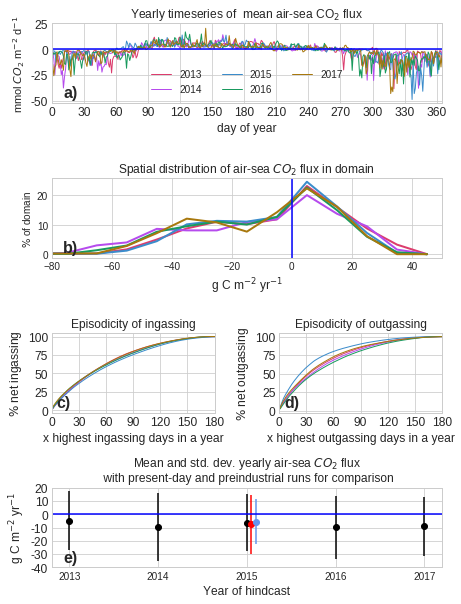

In [18]:
fact = 1
fs = 12
lw = 1

fig = plt.figure(figsize=(6.5*fact, 8.5*fact))
ax1 = plt.subplot2grid((4,2), (0,0), colspan=2, rowspan=1) 
ax1.plot(days,hindcast2013_co2_flx_1d, \
         color = tcm(1.*1/5),linewidth = lw, linestyle = '-', label = '2013')
ax1.plot(days,hindcast2014_co2_flx_1d, \
         color = tcm(1.*2/5),linewidth = lw, linestyle = '-', label = '2014')
ax1.plot(days,hindcast2015_co2_flx_1d, \
         color = tcm(1.*3/5),linewidth = lw, linestyle = '-', label = '2015')
ax1.plot(days,hindcast2016_co2_flx_1d, \
         color = tcm(1.*4/5),linewidth = lw, linestyle = '-', label = '2016')
ax1.plot(days,hindcast2017_co2_flx_1d, \
         color = tcm(1.*5/5),linewidth = lw, linestyle = '-', label = '2017')

ax1.axhline(y=0, color = 'blue')
ax1.set_yticks(np.arange(-50,50,25))
ax1.set_yticklabels(np.arange(-50,50,25),fontsize = fs)

ax1.set_ylabel('mmol $CO_2$ m$^{-2}$ d$^{-1}$', fontsize = 11)
ax1.set_title('Yearly timeseries of  mean air-sea CO$_2$ flux', fontsize = 12)
ax1.set_xlim(0,365)
w = ax1.set_xticks(np.arange(0, 365, step=30))

ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.legend(loc="lower center",ncol=3, fontsize = fs-2)
w = ax1.set_xticks(np.arange(0, 365, step=30))
ax1.set_xlim(0,365)
ax1.set_xlabel('day of year', fontsize = fs)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax1 = plt.subplot2grid((4,2), (1,0), colspan=2, rowspan=1)
ax1.set_title('Spatial distribution of air-sea $CO_2$ flux in domain')
ax1.set_ylabel('$\%$ of domain')
ax1.set_xlabel('g C m$^{-2}$ yr$^{-1}$', fontsize = 12)

nbins = 19

hist_2013, bins = np.histogram(year_2013[~np.isnan(year_2013)], bins=19, range = [-140, 50])
bin_cent = bins + (bins[1]-bins[0])/2
ax1.plot(bin_cent[0:nbins],hist_2013/np.sum(hist_2013)*100, lw = 2, color = tcm(1.*1/5))

hist_2014, bins = np.histogram(year_2014[~np.isnan(year_2014)], bins=19, range = [-140, 50])
bin_cent = bins + (bins[1]-bins[0])/2
ax1.plot(bin_cent[0:nbins],hist_2014/np.sum(hist_2014)*100, lw = 2, color = tcm(2.*1/5))

hist_2015, bins = np.histogram(year_2015[~np.isnan(year_2015)], bins=19, range = [-140, 50])
bin_cent = bins + (bins[1]-bins[0])/2
ax1.plot(bin_cent[0:nbins],hist_2015/np.sum(hist_2015)*100, lw = 2, color = tcm(3.*1/5))

hist_2016, bins = np.histogram(year_2016[~np.isnan(year_2016)], bins=19, range = [-140, 50])
bin_cent = bins + (bins[1]-bins[0])/2
ax1.plot(bin_cent[0:nbins],hist_2016/np.sum(hist_2016)*100, lw = 2, color = tcm(4.*1/5))

hist_2017, bins = np.histogram(year_2017[~np.isnan(year_2017)], bins=19, range = [-140, 50])
bin_cent = bins + (bins[1]-bins[0])/2
ax1.plot(bin_cent[0:nbins],hist_2017/np.sum(hist_2017)*100, lw = 2, color = tcm(5.*1/5))
ax1.set_xlim([-80,50])
ax1.axvline(x = 0, color = 'blue')
ax1.text(0.03, 0.03, 'b)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax1 = plt.subplot2grid((4,2), (2,0), colspan=1, rowspan=1)
ax1.plot(days,pos_prop_2013*100, color = tcm(1.*1/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2013, days ingassing = '+ str(np.size(pos2013)))
ax1.plot(days,pos_prop_2014*100, color = tcm(1.*2/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2014, days ingassing = '+ str(np.size(pos2014)))
ax1.plot(days,pos_prop_2015*100, color = tcm(1.*3/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2015, days ingassing = '+ str(np.size(pos2015)))
ax1.plot(days,pos_prop_2016*100, color = tcm(1.*4/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2016, days ingassing = '+ str(np.size(pos2016)))
ax1.plot(days,pos_prop_2017*100,  color = tcm(1.*5/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2017, days ingassing = '+ str(np.size(pos2017)))

ax1.set_yticks(np.arange(0,125,25))
ax1.set_yticklabels(np.arange(0,125,25),fontsize = fs)
ax1.set_xticks(np.arange(0,200,30))
ax1.set_xticklabels(np.arange(0,200,30),fontsize = fs)
ax1.set_xlim([0,180])
ax1.set_xlabel('x highest ingassing days in a year', fontsize = fs)
ax1.set_ylabel('$\%$ net ingassing ', fontsize = fs)
ax1.set_title('Episodicity of ingassing', fontsize = fs)
ax1.text(0.03, 0.03, 'c)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')

ax1 = plt.subplot2grid((4,2), (2,1), colspan=1, rowspan=1)
ax1.plot(days,neg_prop_2013*100, color = tcm(1.*1/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2013, days outgassing = '+ str(np.size(neg2013)))
ax1.plot(days,neg_prop_2014*100, color = tcm(1.*2/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2014, days outgassing = '+ str(np.size(neg2014)))
ax1.plot(days,neg_prop_2015*100, color = tcm(1.*3/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2015, days outgassing = '+ str(np.size(neg2015)))
ax1.plot(days,neg_prop_2016*100, color = tcm(1.*4/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2016, days outgassing = '+ str(np.size(neg2016)))
ax1.plot(days,neg_prop_2017*100,  color = tcm(1.*5/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2017, days outgassing = '+ str(np.size(neg2017)))

ax1.axvline(x = 0, color = 'blue')
ax1.set_yticks(np.arange(0,125,25))
ax1.set_yticklabels(np.arange(0,125,25),fontsize = fs)
ax1.set_xticks(np.arange(0,200,30))
ax1.set_xticklabels(np.arange(0,200,30),fontsize = fs)
ax1.set_xlim([0,180])
ax1.set_xlabel('x highest outgassing days in a year', fontsize = fs)
ax1.set_ylabel('$\%$ net outgassing ', fontsize = fs)
ax1.set_title('Episodicity of outgassing', fontsize = fs)
ax1.text(0.03, 0.03, 'd)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax1 = plt.subplot2grid((4,2), (3,0), colspan=2, rowspan=1)
for i in range(0,len(xs)):
    er1 = ax1.errorbar(xs[i], yrs_means[i], yerr=[yrs_stds[i]], marker="o", linestyle="none", color = 'black')

ax1.errorbar(2015.05, BR_mean, yerr=[BR_std], marker="o", linestyle="none", color = 'red', label = 'BR run')
ax1.errorbar(2015.10, PI_mean, yerr=[PI_std], marker="o", linestyle="none", color = 'cornflowerblue', label = 'PI run')
ax1.axhline(y = 0, color = 'blue')

ax1.set_xticks(np.arange(2013,2018,1))
ax1.set_ylabel('g C m$^{-2}$ yr$^{-1}$', fontsize = fs)
ax1.set_yticks(np.arange(-40,30,10))
ax1.set_yticklabels(np.arange(-40,30,10),fontsize = fs)
ax1.set_xlabel('Year of hindcast', fontsize = fs)
ax1.set_title('Mean and std. dev. yearly air-sea $CO_2$ flux\n with present-day and preindustrial runs for comparison', fontsize = fs)
ax1.text(0.03, 0.03, 'e)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')

#ax1.legend(loc = 'lower left', ncol = 2)
#plt.suptitle('Some Air-Sea Flux Statistics, 5 years of hindcast', fontsize = 15, y = 0.99)
plt.tight_layout()

fig.savefig('SF_ASflux.png',dpi = 300)